Best Route: [9, 1, 6, 7, 0, 12, 4, 8, 2, 3, 11, 13, 10, 5, 14]
Fitness (1 / distance): 0.3148785357550586


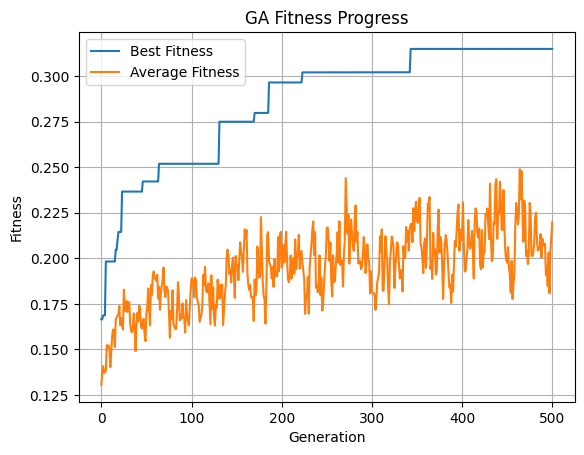

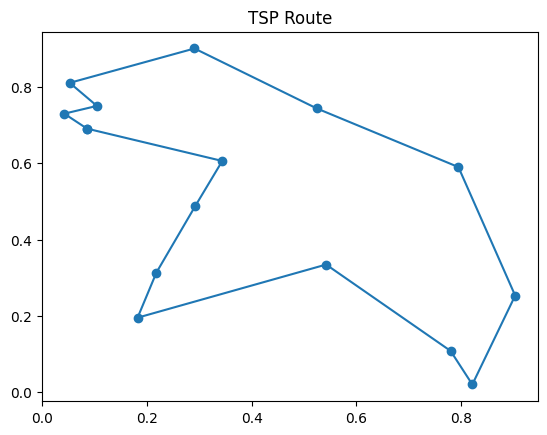

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

POPULATION_SIZE = 20
MUTATION_RATE = 0.2
CROSSOVER_RATE = 0.9
MAX_GENERATIONS = 500
ELITISM_COUNT = 2
NUM_CITIES = 15

class TSPGeneticAlgorithm:
    def __init__(self):
        self.population = []
        self.best_fitness_history = []
        self.average_fitness_history = []
        self.cities = np.random.rand(NUM_CITIES, 2)
        self.distance_matrix = self.compute_distance_matrix()

    def compute_distance_matrix(self):
        d = np.zeros((NUM_CITIES, NUM_CITIES))
        for i in range(NUM_CITIES):
            for j in range(NUM_CITIES):
                d[i][j] = np.linalg.norm(self.cities[i] - self.cities[j])
        return d

    def initialize_population(self):
        self.population = [list(np.random.permutation(NUM_CITIES)) for _ in range(POPULATION_SIZE)]

    def calculate_fitness(self, individual):
        distance = sum(self.distance_matrix[individual[i]][individual[i+1]] for i in range(len(individual)-1))
        distance += self.distance_matrix[individual[-1]][individual[0]]
        return 1 / distance

    def evaluate_population(self):
        best = None
        best_fitness = -1
        total_fitness = 0
        for ind in self.population:
            fitness = self.calculate_fitness(ind)
            total_fitness += fitness
            if fitness > best_fitness:
                best_fitness = fitness
                best = ind
        avg_fitness = total_fitness / len(self.population)
        self.best_fitness_history.append(best_fitness)
        self.average_fitness_history.append(avg_fitness)
        return best, best_fitness

    def selection(self):
        fitness_values = [self.calculate_fitness(ind) for ind in self.population]
        total = sum(fitness_values)
        probs = [f / total for f in fitness_values]
        return random.choices(self.population, weights=probs, k=2)

    def crossover(self, parent1, parent2):
        if random.random() > CROSSOVER_RATE:
            return parent1.copy(), parent2.copy()
        size = len(parent1)
        p1, p2 = sorted(random.sample(range(size), 2))
        child1 = [-1]*size
        child2 = [-1]*size
        child1[p1:p2+1] = parent1[p1:p2+1]
        child2[p1:p2+1] = parent2[p1:p2+1]
        def fill(child, parent):
            pos = (p2 + 1) % size
            for gene in parent:
                if gene not in child:
                    child[pos] = gene
                    pos = (pos + 1) % size
            return child
        return fill(child1, parent2), fill(child2, parent1)

    def mutation(self, individual):
        if random.random() < MUTATION_RATE:
            i, j = random.sample(range(len(individual)), 2)
            individual[i], individual[j] = individual[j], individual[i]
        return individual

    def create_new_generation(self):
        new_population = []
        elite = sorted(self.population, key=self.calculate_fitness, reverse=True)[:ELITISM_COUNT]
        new_population.extend(elite)
        while len(new_population) < POPULATION_SIZE:
            p1, p2 = self.selection()
            c1, c2 = self.crossover(p1, p2)
            new_population.extend([self.mutation(c1), self.mutation(c2)])
        self.population = new_population[:POPULATION_SIZE]

    def run(self):
        self.initialize_population()
        best_ind, best_fit = self.evaluate_population()
        for gen in range(MAX_GENERATIONS):
            self.create_new_generation()
            curr_best, curr_fit = self.evaluate_population()
            if curr_fit > best_fit:
                best_ind = curr_best.copy()
                best_fit = curr_fit
        return best_ind, best_fit

    def plot_results(self):
        plt.plot(self.best_fitness_history, label='Best Fitness')
        plt.plot(self.average_fitness_history, label='Average Fitness')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('GA Fitness Progress')
        plt.legend()
        plt.grid(True)
        plt.show()

    def visualize_solution(self, solution):
        coords = self.cities[solution + [solution[0]]]
        plt.plot(coords[:, 0], coords[:, 1], marker='o')
        plt.title('TSP Route')
        plt.show()

ga = TSPGeneticAlgorithm()
best_sol, best_fit = ga.run()
print("Best Route:", best_sol)
print("Fitness (1 / distance):", best_fit)
ga.plot_results()
ga.visualize_solution(best_sol)
